# Calling Packages 

In [2]:
library(caret)
library(rpart)
library(dplyr)
library(ROSE)
library(randomForest)
library(rpart.plot)
library(xgboost)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loaded ROSE 0.0-4


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




# Read the data

In [3]:
credit_card = read.csv(file = '/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
View(credit_card)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,-1.3598071,-0.07278117,2.53634674,1.37815522,-0.338320770,0.46238778,0.239598554,0.098697901,0.3637870,⋯,-0.018306778,0.277837576,-0.110473910,0.06692807,0.12853936,-0.18911484,0.133558377,-0.021053053,149.62,0
0,1.1918571,0.26615071,0.16648011,0.44815408,0.060017649,-0.08236081,-0.078802983,0.085101655,-0.2554251,⋯,-0.225775248,-0.638671953,0.101288021,-0.33984648,0.16717040,0.12589453,-0.008983099,0.014724169,2.69,0
1,-1.3583541,-1.34016307,1.77320934,0.37977959,-0.503198133,1.80049938,0.791460956,0.247675787,-1.5146543,⋯,0.247998153,0.771679402,0.909412262,-0.68928096,-0.32764183,-0.13909657,-0.055352794,-0.059751841,378.66,0
1,-0.9662717,-0.18522601,1.79299334,-0.86329128,-0.010308880,1.24720317,0.237608940,0.377435875,-1.3870241,⋯,-0.108300452,0.005273597,-0.190320519,-1.17557533,0.64737603,-0.22192884,0.062722849,0.061457629,123.50,0
2,-1.1582331,0.87773675,1.54871785,0.40303393,-0.407193377,0.09592146,0.592940745,-0.270532677,0.8177393,⋯,-0.009430697,0.798278495,-0.137458080,0.14126698,-0.20600959,0.50229222,0.219422230,0.215153147,69.99,0
2,-0.4259659,0.96052304,1.14110934,-0.16825208,0.420986881,-0.02972755,0.476200949,0.260314333,-0.5686714,⋯,-0.208253515,-0.559824796,-0.026397668,-0.37142658,-0.23279382,0.10591478,0.253844225,0.081080257,3.67,0
4,1.2296576,0.14100351,0.04537077,1.20261274,0.191880989,0.27270812,-0.005159003,0.081212940,0.4649600,⋯,-0.167716266,-0.270709726,-0.154103787,-0.78005542,0.75013694,-0.25723685,0.034507430,0.005167769,4.99,0
7,-0.6442694,1.41796355,1.07438038,-0.49219902,0.948934095,0.42811846,1.120631358,-3.807864239,0.6153747,⋯,1.943465340,-1.015454710,0.057503530,-0.64970901,-0.41526657,-0.05163430,-1.206921081,-1.085339188,40.80,0
7,-0.8942861,0.28615720,-0.11319221,-0.27152613,2.669598660,3.72181806,0.370145128,0.851084443,-0.3920476,⋯,-0.073425100,-0.268091632,-0.204232670,1.01159180,0.37320468,-0.38415731,0.011747356,0.142404330,93.20,0


## Columns names

In [5]:
cols <- names(credit_card)

In [6]:
cols

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

## Get the structure of the data

In [32]:
dim(credit_card)

[1] 284807     31

In [7]:
str(credit_card)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [8]:
head(credit_card)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


## Converting the Class to factor as it has 0 (non-frauds) and 1 (frauds)

In [9]:
credit_card$Class = as.factor(credit_card$Class)

## Summarizing the count of the Frauds and Non-Frauds 

In [10]:
summary(credit_card$Class)

0      1 
284315    492

## Check Null Values

In [11]:
sum(is.na(credit_card))

[1] 0

## Separating the frauds and non-frauds into new dfs

In [12]:
credit_card.true = credit_card[credit_card$Class == 0,]
credit_card.false = credit_card[credit_card$Class == 1,]

# Visualize the data

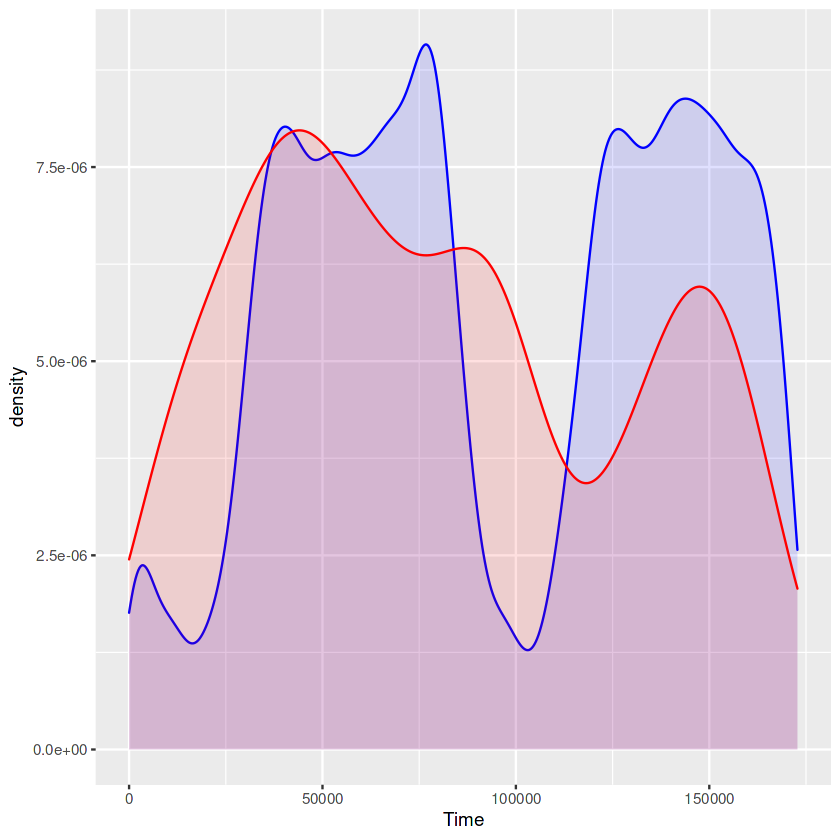

In [13]:
ggplot()+geom_density(data = credit_card.true,aes(x = Time),color="blue",
                      fill="blue",alpha=0.12)+
  geom_density(data = credit_card.false,aes(x = Time),color="red",fill="red",
               alpha=0.12)

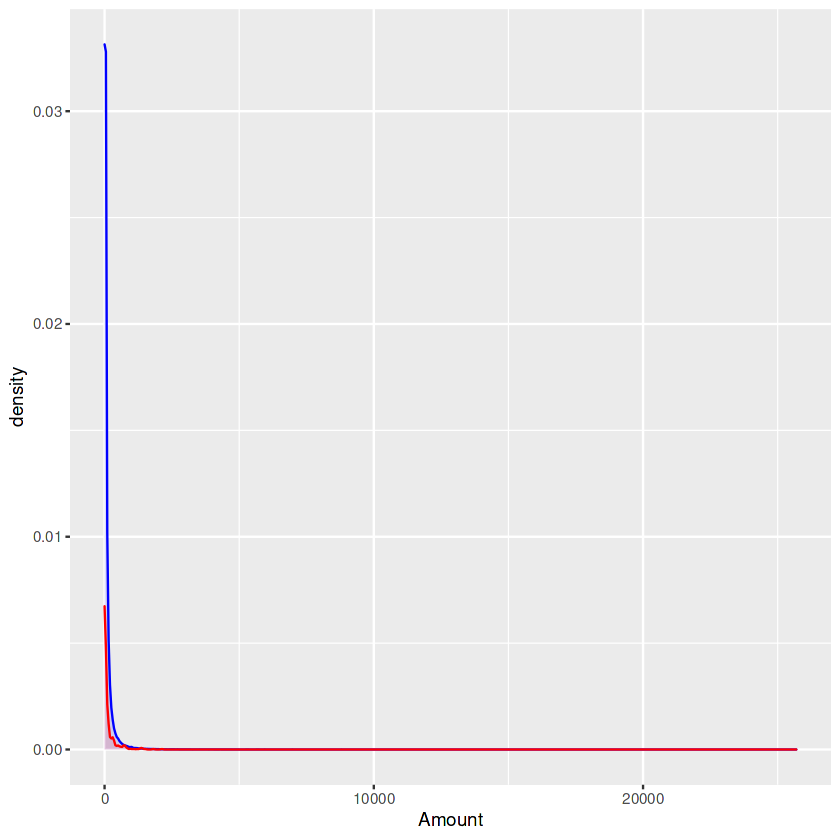

In [14]:
ggplot()+geom_density(data = credit_card.true,aes(x = Amount),color="blue",
                      fill="blue",alpha=0.12)+
  geom_density(data = credit_card.false,aes(x = Amount),color="red",fill="red",
               alpha=0.12)


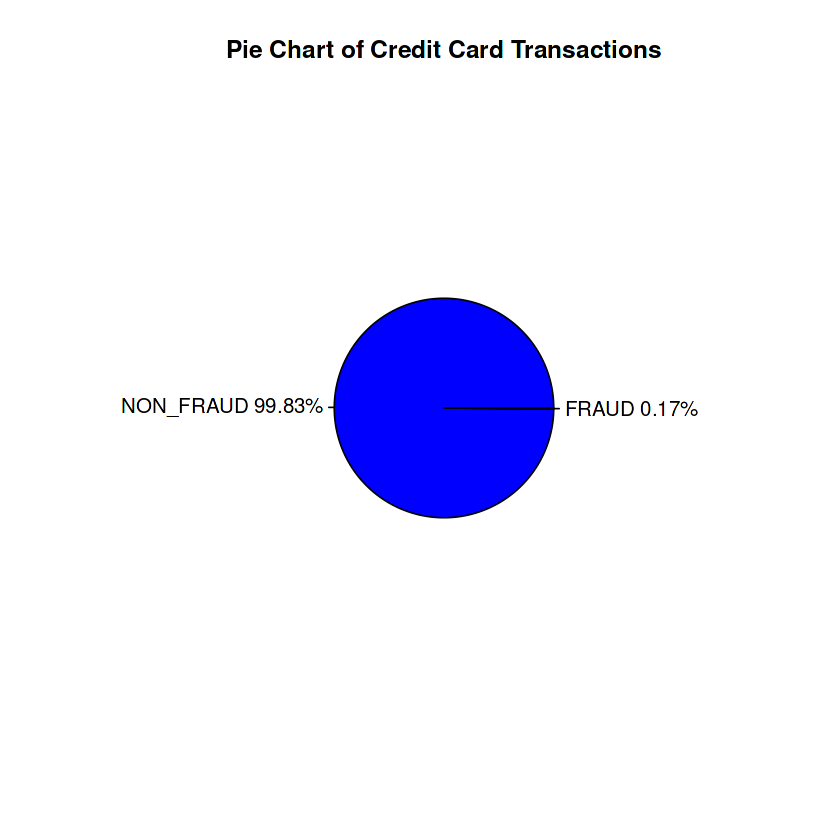

In [15]:
labels = c("NON_FRAUD","FRAUD")
labels = paste(labels,round(prop.table(table(credit_card$Class))*100,2))
labels = paste0(labels,"%")
pie(table(credit_card$Class),labels,col = c("blue","red"),
    main = "Pie Chart of Credit Card Transactions")


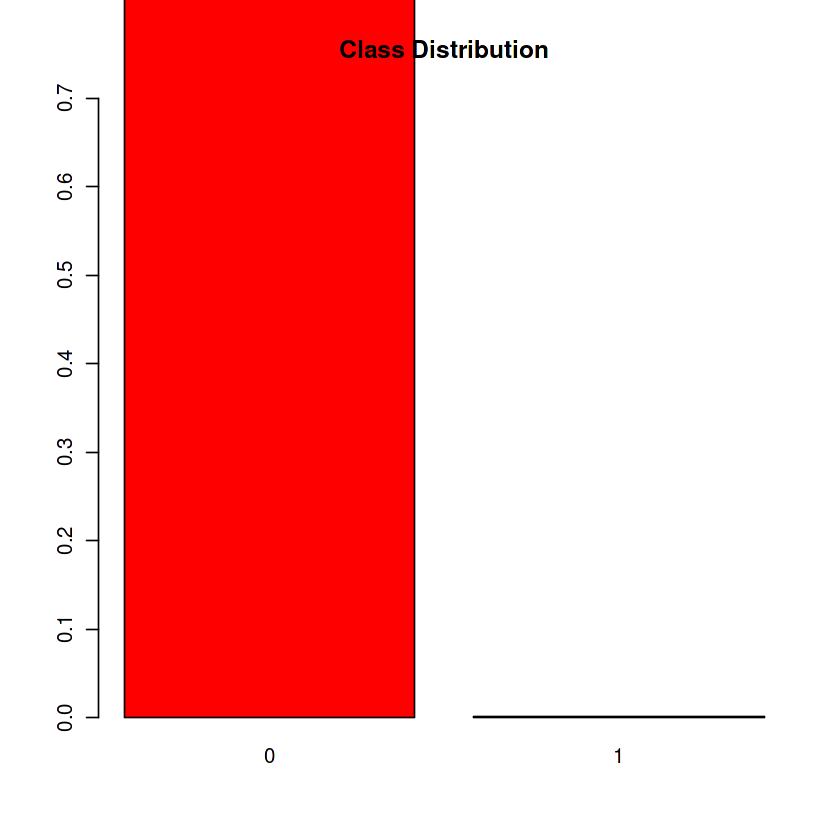

In [16]:
barplot(prop.table(table(credit_card$Class)),
        col = rainbow(2),
        ylim = c(0, 0.7),
        main = "Class Distribution")

# Data Splitting

In [17]:
rows = nrow(credit_card)
cols = ncol(credit_card)

set.seed(39)
credit_card = credit_card[sample(rows),1:cols]
ntr = as.integer(round(0.8*rows))

credit_card.train = credit_card[1:ntr,1:cols] # for train
credit_card.test = credit_card[(ntr+1):rows,-cols] # for test input
credit_card.testc = credit_card[(ntr+1):rows,cols] # for test data CLass

credit_card.testc = as.data.frame(credit_card.testc)
colnames(credit_card.testc)[1] = c("Class")

In [18]:
prop.table(table(credit_card$Class))


          0           1 
0.998272514 0.001727486 

In [19]:
summary(credit_card.train)

      Time              V1                  V2                  V3           
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.32559  
 1st Qu.: 54107   1st Qu.: -0.92104   1st Qu.: -0.59766   1st Qu.: -0.88850  
 Median : 84634   Median :  0.01853   Median :  0.06635   Median :  0.17994  
 Mean   : 94760   Mean   :  0.00037   Mean   : -0.00109   Mean   :  0.00133  
 3rd Qu.:139290   3rd Qu.:  1.31540   3rd Qu.:  0.80362   3rd Qu.:  1.02772  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  4.22611  
       V4                  V5                   V6           
 Min.   :-5.600607   Min.   :-113.74331   Min.   :-26.16051  
 1st Qu.:-0.846417   1st Qu.:  -0.69074   1st Qu.: -0.76735  
 Median :-0.020147   Median :  -0.05422   Median : -0.27401  
 Mean   : 0.000383   Mean   :   0.00076   Mean   :  0.00098  
 3rd Qu.: 0.741919   3rd Qu.:   0.61268   3rd Qu.:  0.39884  
 Max.   :16.875344   Max.   :  34.80167   Max.   : 73.30163  
       V7           

# LOGISTIC REGRESSION

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 56846    38
         1     9    68
                                          
               Accuracy : 0.9992          
                 95% CI : (0.9989, 0.9994)
    No Information Rate : 0.9981          
    P-Value [Acc > NIR] : 9.484e-11       
                                          
                  Kappa : 0.7428          
                                          
 Mcnemar's Test P-Value : 4.423e-05       
                                          
            Sensitivity : 0.9998          
            Specificity : 0.6415          
         Pos Pred Value : 0.9993          
         Neg Pred Value : 0.8831          
             Prevalence : 0.9981          
         Detection Rate : 0.9980          
   Detection Prevalence : 0.9986          
      Balanced Accuracy : 0.8207          
                                          
       'Positive' Class : 0               
                  

Area under the curve (AUC): 0.821

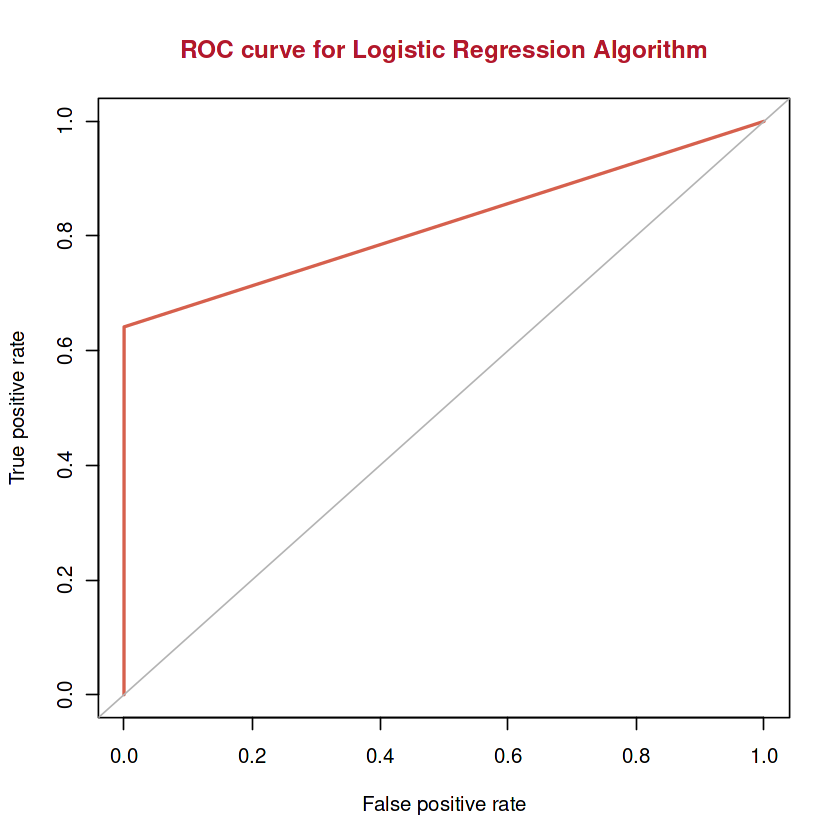

In [20]:
glm_fit <- glm(Class ~ ., data = credit_card.train, family = 'binomial')
pred_glm <- predict(glm_fit,credit_card.test, type = 'response')

credit_card.testc$Pred = 0L
credit_card.testc$Pred[pred_glm>0.5] = 1L
credit_card.testc$Pred = factor(credit_card.testc$Pred)

confusionMatrix(credit_card.testc$Pred,credit_card.testc$Class)

roc.curve(credit_card.testc$Class,credit_card.testc$Pred,plotit = TRUE,
          col="#D6604D",main = "ROC curve for Logistic Regression Algorithm",
          col.main="#B2182B")

# Decision Tree

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 56848    24
         1     7    82
                                          
               Accuracy : 0.9995          
                 95% CI : (0.9992, 0.9996)
    No Information Rate : 0.9981          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8408          
                                          
 Mcnemar's Test P-Value : 0.004057        
                                          
            Sensitivity : 0.9999          
            Specificity : 0.7736          
         Pos Pred Value : 0.9996          
         Neg Pred Value : 0.9213          
             Prevalence : 0.9981          
         Detection Rate : 0.9980          
   Detection Prevalence : 0.9984          
      Balanced Accuracy : 0.8867          
                                          
       'Positive' Class : 0               
                  

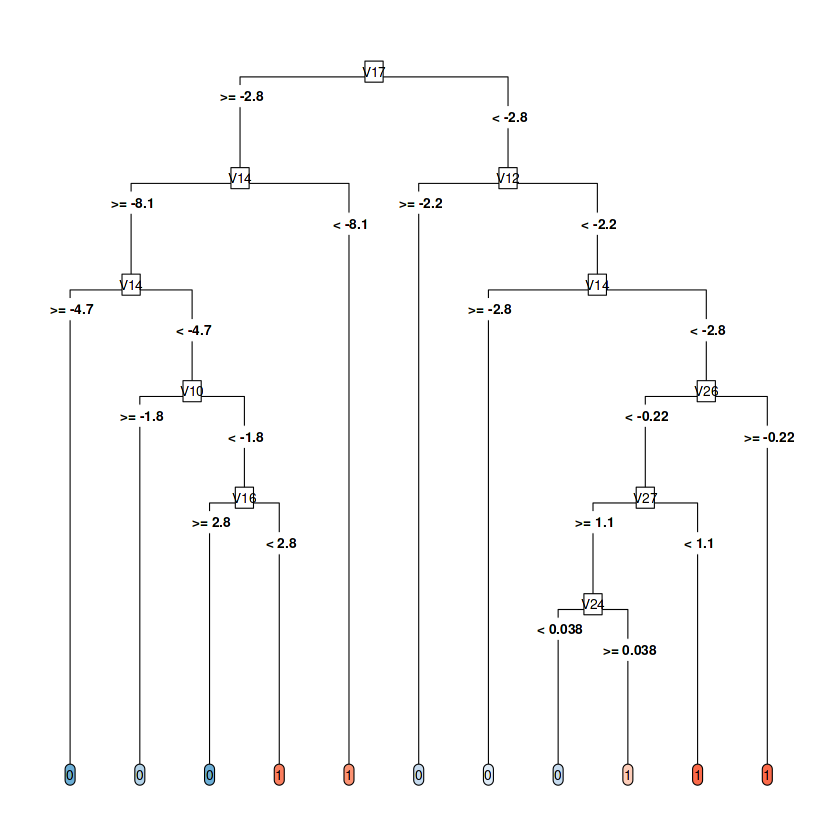

Area under the curve (AUC): 0.887

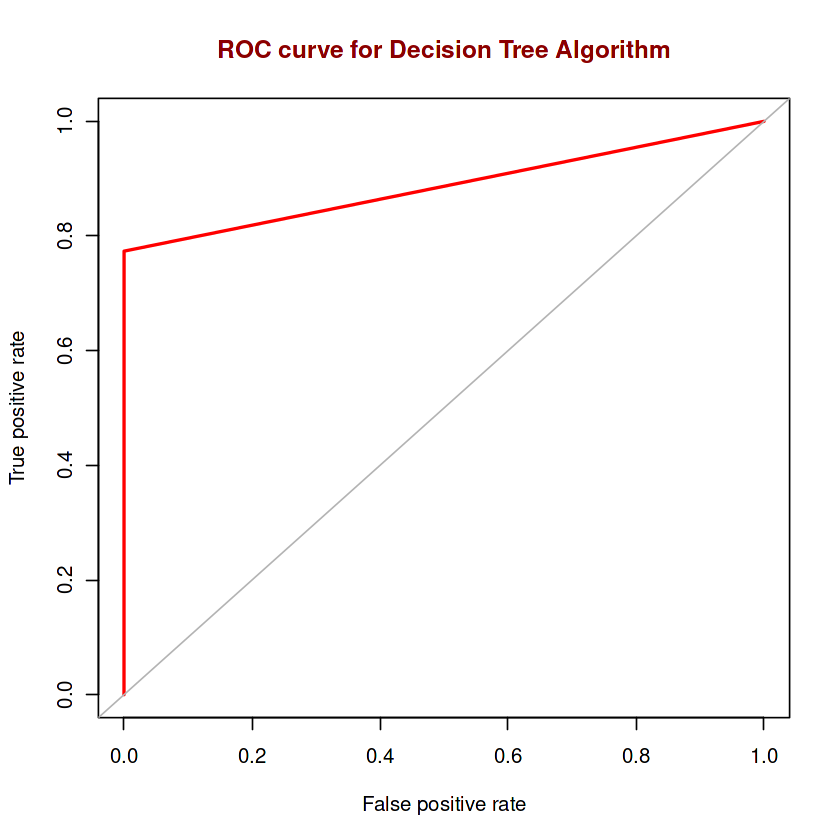

In [21]:
tree = rpart(Class ~ .,data = credit_card.train,method = "class")
pred_tree = predict(tree,credit_card.test)

credit_card.testc$Pred = 0L
credit_card.testc$Pred[pred_tree[,2]>0.5] = 1L
credit_card.testc$Pred = factor(credit_card.testc$Pred)

confusionMatrix(credit_card.testc$Pred,credit_card.testc$Class)

rpart.plot(tree,cex=0.66,extra = 0,type=5,box.palette = "BuRd")

roc.curve(credit_card.testc$Class,credit_card.testc$Pred,plotit = TRUE,
          col="red",main = "ROC curve for Decision Tree Algorithm",
          col.main="darkred")


# Random Forest

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 56853    21
         1     2    85
                                          
               Accuracy : 0.9996          
                 95% CI : (0.9994, 0.9997)
    No Information Rate : 0.9981          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8806          
                                          
 Mcnemar's Test P-Value : 0.0001746       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.8019          
         Pos Pred Value : 0.9996          
         Neg Pred Value : 0.9770          
             Prevalence : 0.9981          
         Detection Rate : 0.9981          
   Detection Prevalence : 0.9985          
      Balanced Accuracy : 0.9009          
                                          
       'Positive' Class : 0               
                  

Area under the curve (AUC): 0.901

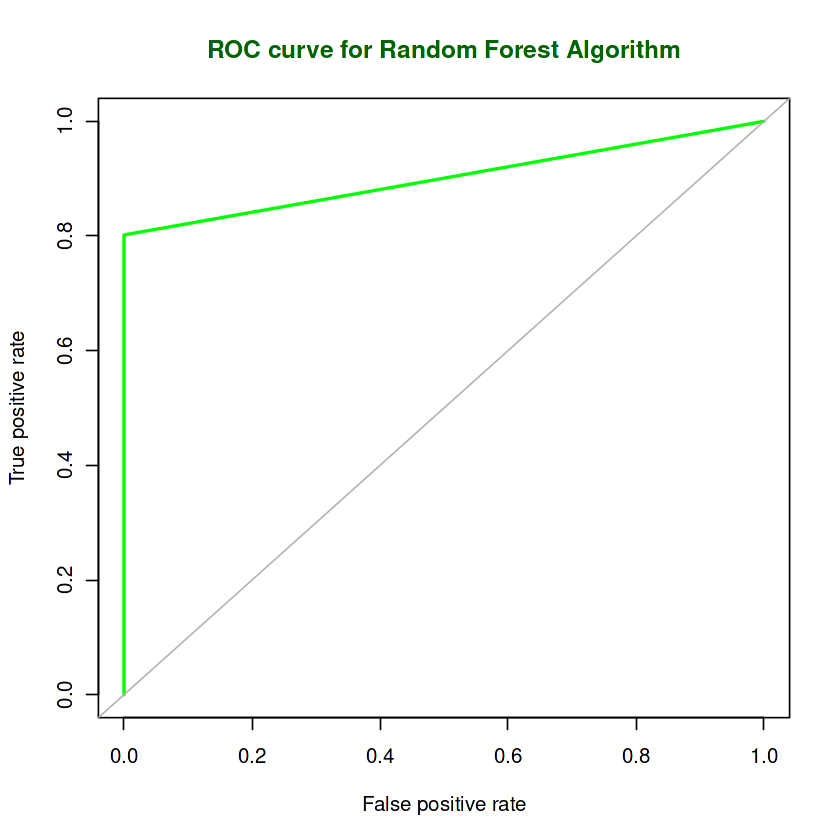

In [22]:
samp = as.integer(0.49*ntr)
rF = randomForest(Class ~ . ,data =credit_card.train,ntree = 39,
                  samplesize = samp,maxnodes=44)
rF_pred = predict(rF,credit_card.test)
credit_card.testc$Pred = rF_pred

confusionMatrix(credit_card.testc$Pred,credit_card.testc$Class)

roc.curve(credit_card.testc$Class,credit_card.testc$Pred,plotit = TRUE,
          col="green",main = "ROC curve for Random Forest Algorithm",
          col.main="darkgreen")

#  XGBoost

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 56854    19
         1     1    87
                                          
               Accuracy : 0.9996          
                 95% CI : (0.9995, 0.9998)
    No Information Rate : 0.9981          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8967          
                                          
 Mcnemar's Test P-Value : 0.0001439       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.8208          
         Pos Pred Value : 0.9997          
         Neg Pred Value : 0.9886          
             Prevalence : 0.9981          
         Detection Rate : 0.9981          
   Detection Prevalence : 0.9985          
      Balanced Accuracy : 0.9104          
                                          
       'Positive' Class : 0               
                  

Area under the curve (AUC): 0.910

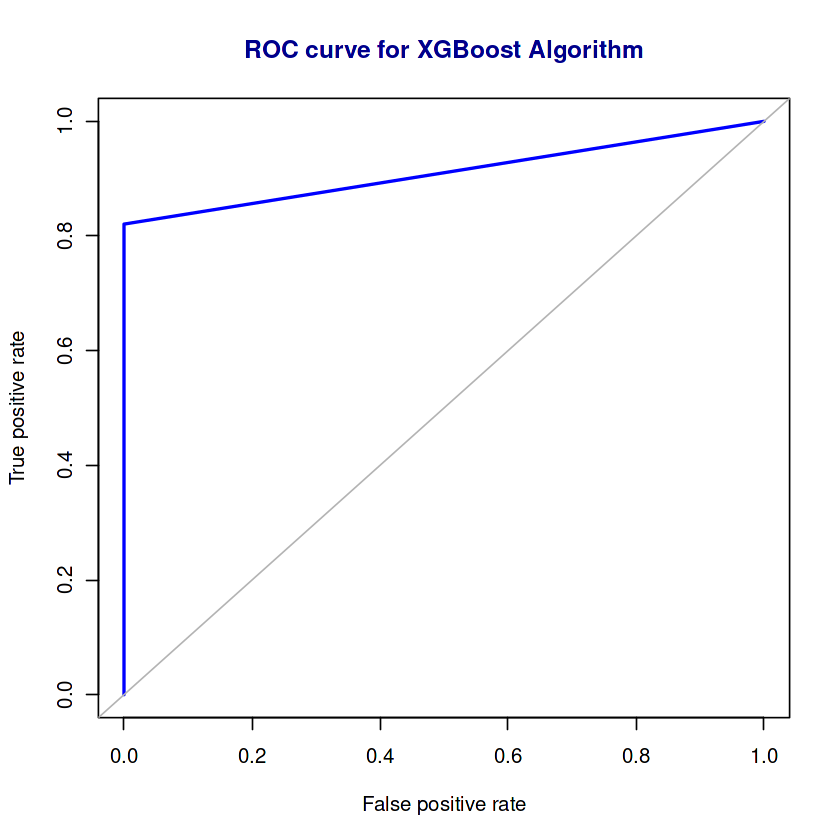

In [23]:
labels <- credit_card.train$Class
y <- recode(labels, '0' = 0, "1" = 1)
xgb <- xgboost(data = data.matrix(credit_card.train[,-31]), 
               label = y,
               eta = 0.1,
               gamma = 0.1,
               max_depth = 10, 
               nrounds = 300, 
               objective = "binary:logistic",
               colsample_bytree = 0.6,
               verbose = 0,
               nthread = 7,
               set.seed(42)
)
xgb_pred <- predict(xgb, data.matrix(credit_card.test))

credit_card.testc$Pred = 0L
credit_card.testc$Pred[xgb_pred>0.5] = 1L
credit_card.testc$Pred = factor(credit_card.testc$Pred)

confusionMatrix(credit_card.testc$Pred,credit_card.testc$Class)

roc.curve(credit_card.testc$Class,credit_card.testc$Pred,plotit = TRUE,
          col="blue",main = "ROC curve for XGBoost Algorithm",
          col.main="darkblue")